In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import DBSCAN

In [2]:
data_1 = np.loadtxt('Data/data_t-SNE_310101_d5_R100_e1_N800.dat', delimiter='\t')
N_1 = len(data_1)
y_data_1 = np.asarray([0]*int(0.1*N_1)+[1]*int(0.3*N_1) + [2]*int(0.6*N_1))
dim_space = data_1.shape[1]

data_2 = np.loadtxt('Data/data_t-SNE_310101_d5_R50_e3_N1000_more-noisy.dat', delimiter='\t')
N_2 = len(data_2)
y_data_2 = np.asarray([0]*int(0.1*N_2)+[1]*int(0.3*N_2) + [2]*int(0.6*N_2))

In [3]:
#to open in a new interactive window
%matplotlib qt 
# Interactive figure inside the notebook
#%matplotlib notebook 
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(data_1[:,0], data_1[:,1], data_1[:,2], c=y_data_1)

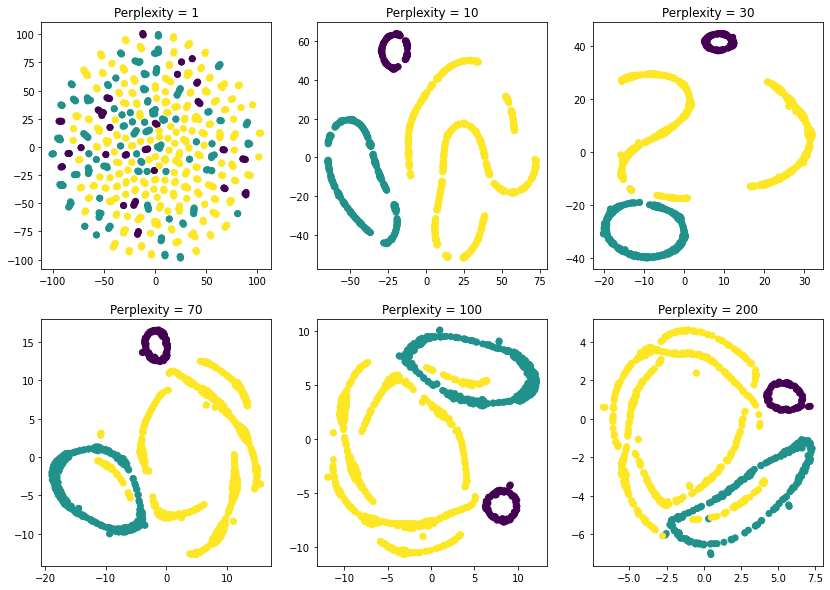

In [4]:
%matplotlib inline
from sklearn.manifold import TSNE

perplexities = [1, 10, 30, 70, 100, 200]
fig, axs = plt.subplots(2,3, figsize=(14,10))
for i in range(len(perplexities)):
    ax = axs[int(np.floor(i/3)),i%3]
    tsne_1 = TSNE(n_components = 2,
                  perplexity = perplexities[i])
    data_1_embedded = tsne_1.fit_transform(data_1)
    ax.scatter(data_1_embedded[:,0], data_1_embedded[:,1], c=y_data_1)
    ax.set_title('Perplexity = %i' %(perplexities[i]))
plt.show()

## Point 3

Small documentation of following function:

INPUT:

- matrix:  the data
- samples: number of samples of the data used to estimate typical distance. Set to the length of the dataset if    it is small, otherwise can be choosen lower.

The function calculates all the distances between points. For each point, the distance to its closest point is kept. An average of these is returned.

In [5]:
def typical_dist(matrix, samples):
    data = matrix
    if(samples<len(data)):
        np.random.shuffle(data)
    tiled = np.tile(data,(1,samples))
    tiled = tiled.reshape(len(data),samples,data.shape[1])
    dist = np.linalg.norm(tiled - data[:samples],axis=2)
    dist[dist==0] = np.nan
    return(np.mean(np.nanmin(dist,axis=0)))

typdist = typical_dist(data_1, N_1)
print('Typical distance data_1: ',typdist)

Typical distance data_1:  2835.7419031856784


In [6]:
# tnse
tsne_1 = TSNE(n_components = 2,perplexity = 30)
data_1_embedded = tsne_1.fit_transform(data_1)

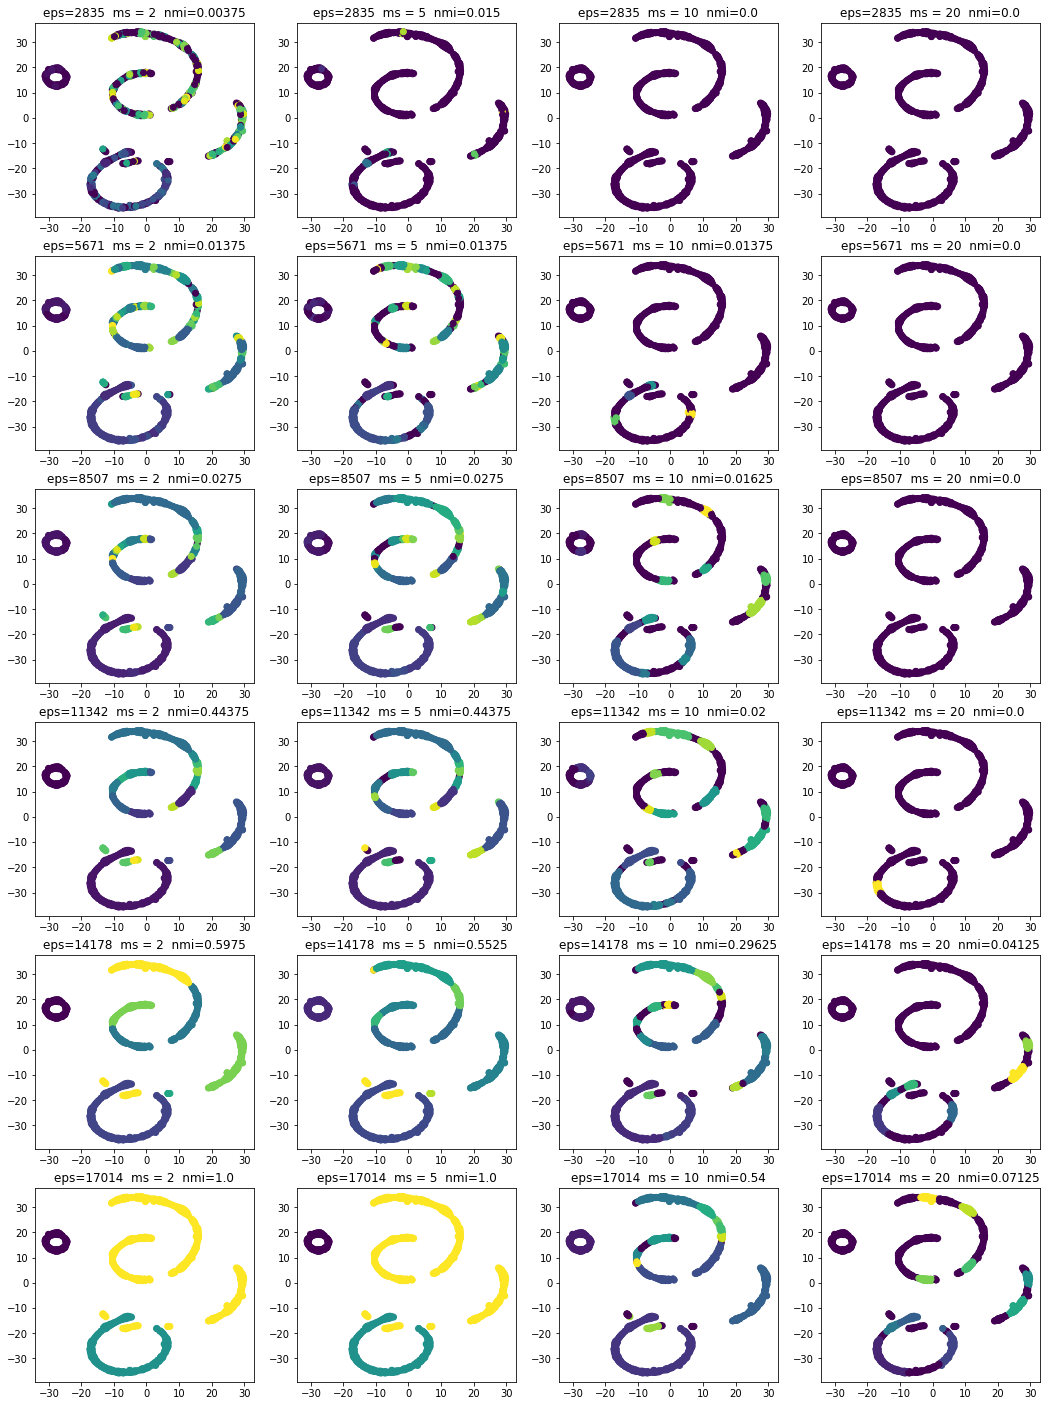

In [9]:
eps_multipliers = np.array([1,2,3,4,5,6])
ms_params = np.array([2,5,10,20])

fig, axs = plt.subplots(6,4, figsize=(18,25))
for ii in range(len(eps_multipliers)):
    for jj in range(len(ms_params)):
        ax = axs[ii,jj]
        eps = int(eps_multipliers[ii]*typdist)
        ms = ms_params[jj]
        dbscan = DBSCAN(eps=eps, min_samples=ms).fit(data_1)
        nmi = np.sum(y_data_1 == dbscan.labels_)/N_1
        ax.scatter(data_1_embedded[:,0], data_1_embedded[:,1], c=dbscan.labels_)
        ax.set_title('eps='+str(eps)+'  ms = '+str(ms)+'  nmi='+str(nmi))
plt.show()

The best solutions seem to be the two on the left down. The typical distance found has to be multiplied for a factor 6, for obtaining a good $\epsilon$ parameter: this is due to the "holes" present in the data of each cluster.

In [7]:
# tnse
tsne_2 = TSNE(n_components = 2,perplexity = 30)
data_2_embedded = tsne_2.fit_transform(data_2)

#typical distance
typdist2 = typical_dist(data_2, N_2)
print('Typical distance data_2: ',typdist2)

Typical distance data_2:  5042.910274612499


In [22]:
eps_multipliers = np.array([3,4,5,6,7])
ms_params = np.arange(1,40)

results = np.zeros((len(eps_multipliers),len(ms_params)))

for ii in range(len(eps_multipliers)):
    for jj in range(len(ms_params)):
        eps = int(eps_multipliers[ii]*typdist)
        ms = ms_params[jj] 
        dbscan = DBSCAN(eps=eps, min_samples=ms).fit(data_2)
        nmi = np.sum(y_data_2 == dbscan.labels_)/N_2
        results[ii][jj] = nmi
print('Better ratio reached: '+str(np.max(results)))

Better ratio reached: 0.569


In [45]:
results

array([[0.097, 0.569, 0.569, 0.497, 0.472, 0.452, 0.25 , 0.052, 0.052,
        0.043, 0.038, 0.039, 0.077, 0.095, 0.087, 0.077, 0.077, 0.077,
        0.026, 0.026, 0.042, 0.031, 0.   , 0.   , 0.   , 0.   , 0.   ,
        0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ,
        0.   , 0.   , 0.   ],
       [0.101, 0.1  , 0.1  , 0.1  , 0.1  , 0.13 , 0.13 , 0.126, 0.535,
        0.534, 0.444, 0.443, 0.533, 0.515, 0.42 , 0.387, 0.52 , 0.249,
        0.216, 0.124, 0.124, 0.103, 0.099, 0.096, 0.096, 0.093, 0.111,
        0.1  , 0.085, 0.085, 0.04 , 0.04 , 0.04 , 0.04 , 0.04 , 0.035,
        0.   , 0.   , 0.   ],
       [0.1  , 0.1  , 0.1  , 0.1  , 0.1  , 0.1  , 0.1  , 0.1  , 0.1  ,
        0.1  , 0.1  , 0.1  , 0.1  , 0.117, 0.1  , 0.1  , 0.1  , 0.443,
        0.444, 0.531, 0.531, 0.512, 0.505, 0.495, 0.484, 0.237, 0.227,
        0.227, 0.221, 0.194, 0.182, 0.177, 0.2  , 0.186, 0.165, 0.137,
        0.125, 0.115, 0.106],
       [0.1  , 0.1  , 0.1  , 0.1  , 0.1  , 0.1  , 0.1  , 0

In [40]:
np.where(results==np.max(results))

(array([0, 0]), array([1, 2]))

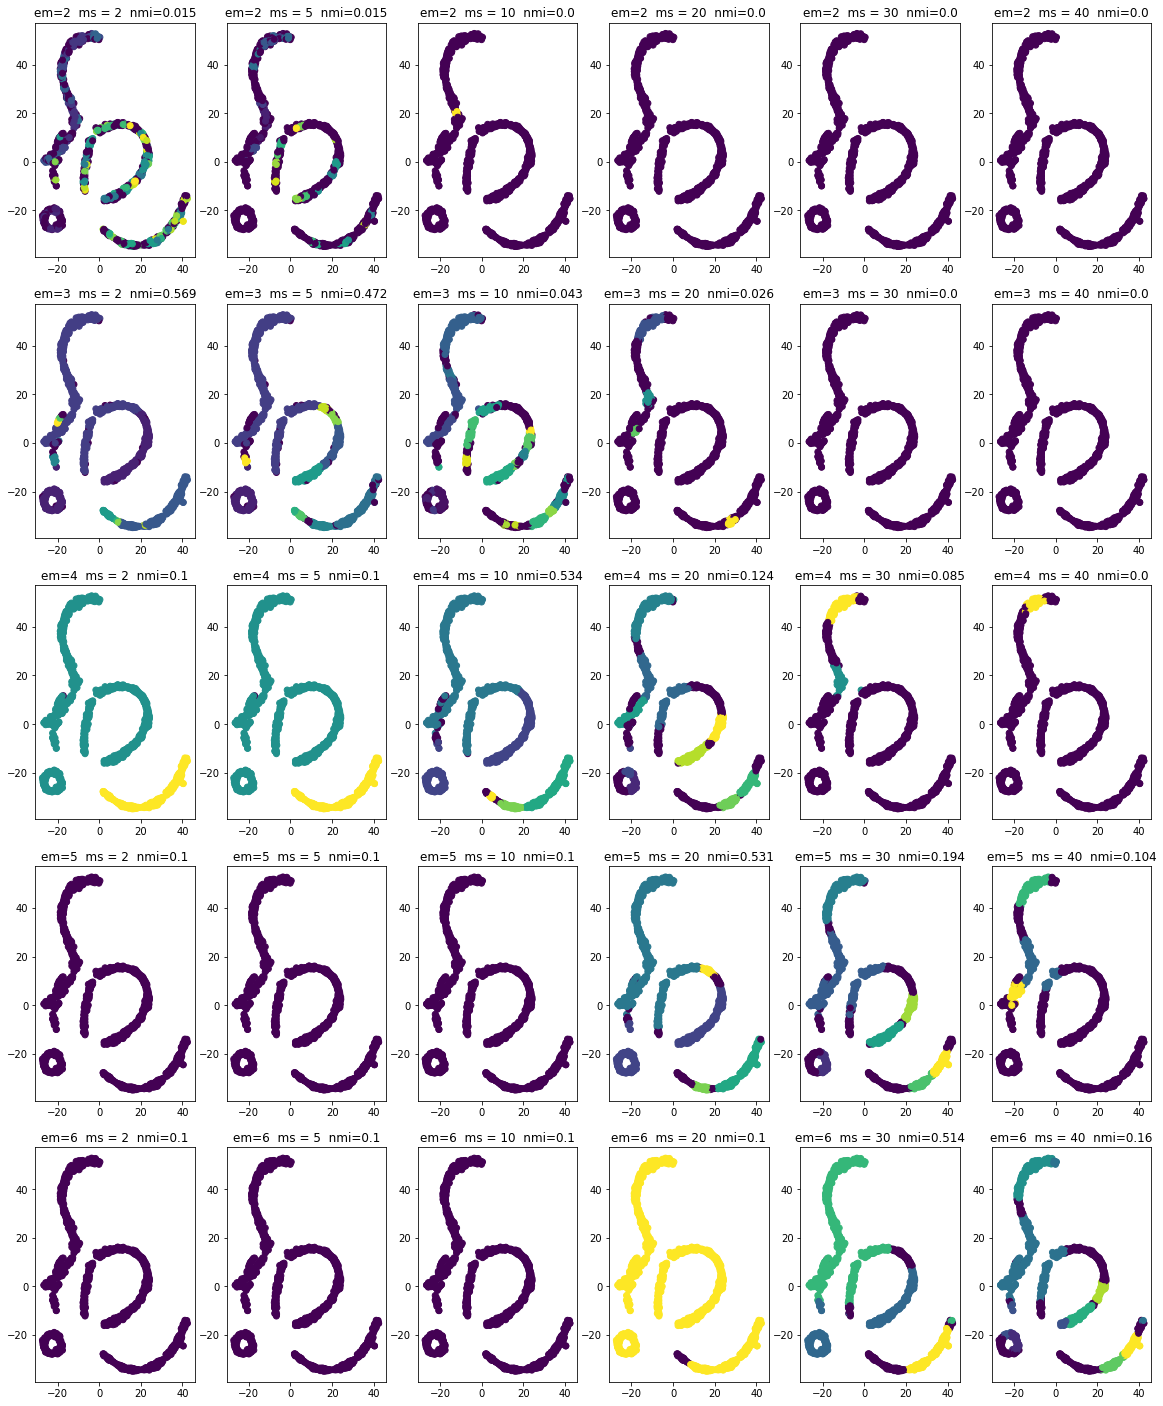

In [25]:
eps_multipliers = np.array([2,3,4,5,6])  #em in the figure labels
ms_params = np.array([2,5,10,20,30,40])

fig, axs = plt.subplots(5,6, figsize=(20,25))
for ii in range(len(eps_multipliers)):
    for jj in range(len(ms_params)):
        ax = axs[ii,jj]
        eps = int(eps_multipliers[ii]*typdist)
        ms = ms_params[jj]
        dbscan = DBSCAN(eps=eps, min_samples=ms).fit(data_2)
        nmi = np.sum(y_data_2 == dbscan.labels_)/N_2
        ax.scatter(data_2_embedded[:,0], data_2_embedded[:,1], c=dbscan.labels_)
        ax.set_title('em='+str(eps_multipliers[ii])+'  ms = '+str(ms)+'  nmi='+str(nmi))
plt.show()

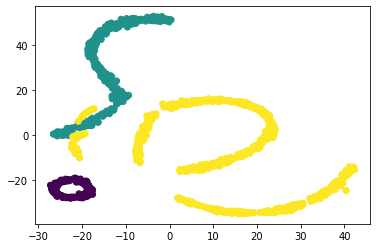

In [12]:
plt.scatter(data_2_embedded[:,0], data_2_embedded[:,1], c=y_data_2)

## Point 4


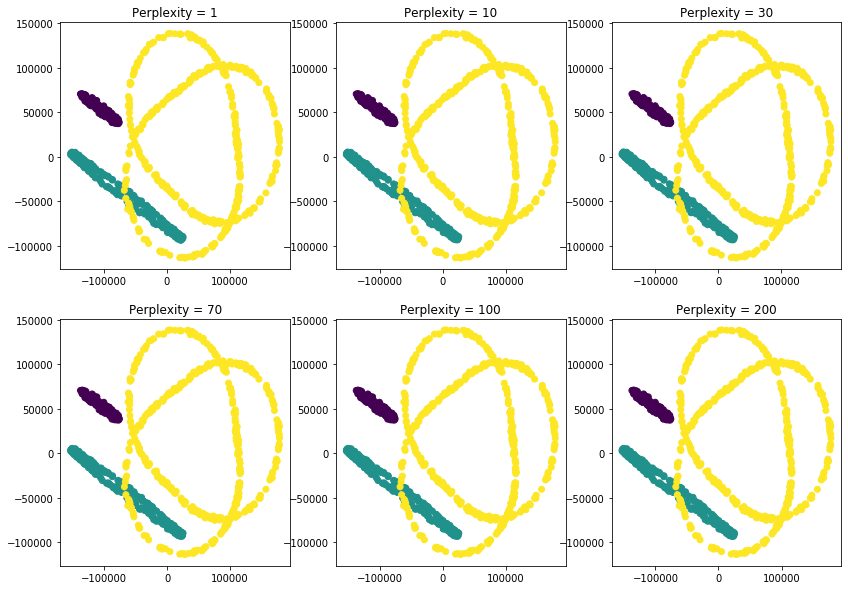

In [5]:
#Let's try to initialize the same perplexity all with PCA
perplexities = [1, 10, 30, 70, 100, 200]
fig, axs = plt.subplots(2,3, figsize=(14,10))
for i in range(len(perplexities)):
    ax = axs[int(np.floor(i/3)),i%3]
    tsne_1 = TSNE(n_components = 2,
                  perplexity = perplexities[i], init = 'pca')
    data_1_embedded = tsne_1.fit_transform(data_1)
    ax.scatter(data_1_embedded[:,0], data_1_embedded[:,1], c=y_data_1)
    ax.set_title('Perplexity = %i' %(perplexities[i]))
plt.show()

#with PCA clearly it doesnt depends on the perplexity

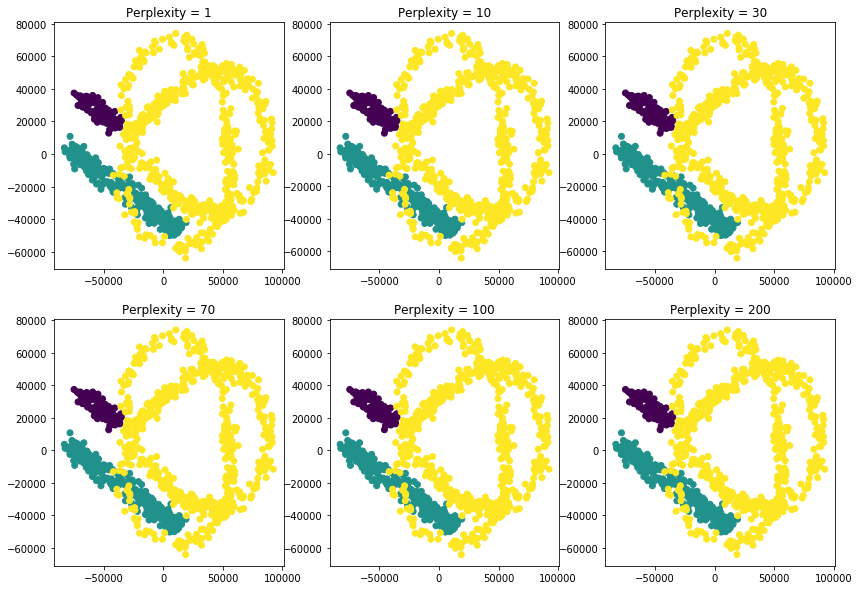

In [33]:
#Let's try to initialize the same perplexity all with PCA but using data_2
perplexities = [1, 10, 30, 70, 100, 200]
fig, axs = plt.subplots(2,3, figsize=(14,10))
for i in range(len(perplexities)):
    ax = axs[int(np.floor(i/3)),i%3]
    tsne_1 = TSNE(n_components = 2,
                  perplexity = perplexities[i], init = 'pca')
    data_2_embedded = tsne_1.fit_transform(data_2)
    ax.scatter(data_2_embedded[:,0], data_2_embedded[:,1], c=y_data_2)
    ax.set_title('Perplexity = %i' %(perplexities[i]))
plt.show()

#applying PCA with noise data gives the same result 

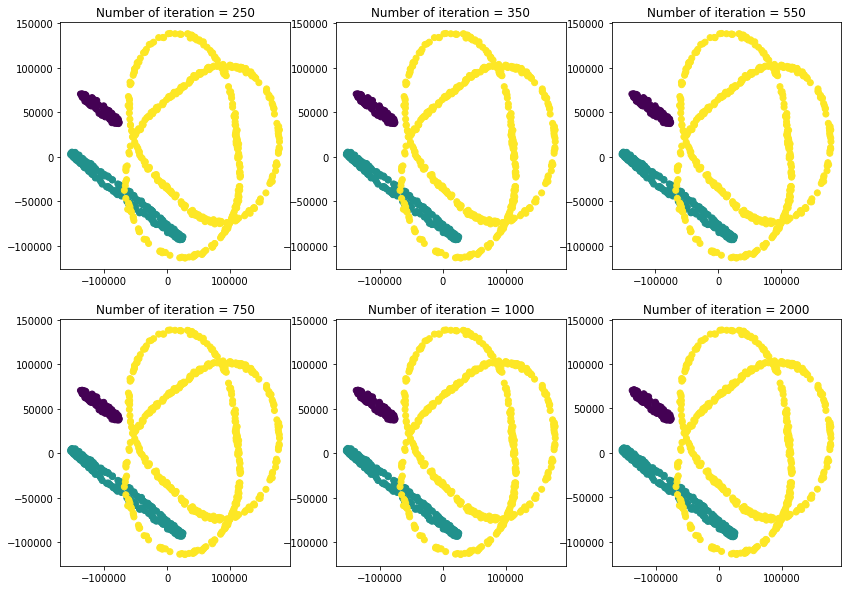

In [31]:
#let's change the number of iteractions
niters = [250, 350, 550, 750, 1000, 2000]
fig, axs = plt.subplots(2,3, figsize=(14,10))
for i in range(len(niters)):
    ax = axs[int(np.floor(i/3)),i%3]
    tsne_1 = TSNE(n_components = 2, init ='pca',
                  n_iter = niters[i])
    data_1_embedded = tsne_1.fit_transform(data_1)
    ax.scatter(data_1_embedded[:,0], data_1_embedded[:,1], c=y_data_1)
    ax.set_title('Number of iteration = %i' %(niters[i]))
plt.show()

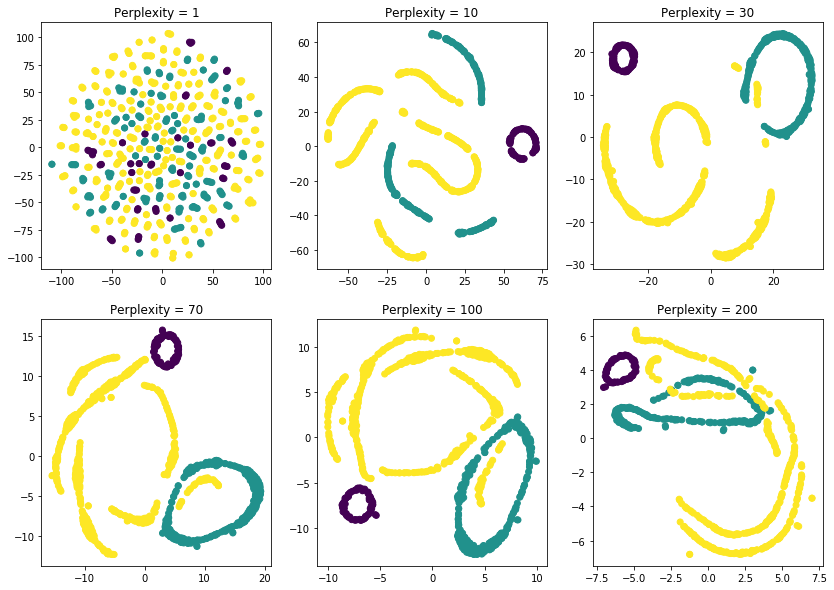

In [12]:
#with random initialization
perplexities = [1, 10, 30, 70, 100, 200]
fig, axs = plt.subplots(2,3, figsize=(14,10))
for i in range(len(perplexities)):
    ax = axs[int(np.floor(i/3)),i%3]
    tsne_1 = TSNE(perplexity = perplexities[i],init='random',
                         random_state=0)
    data_1_embedded = tsne_1.fit_transform(data_1)
    ax.scatter(data_1_embedded[:,0], data_1_embedded[:,1], c=y_data_1)
    ax.set_title('Perplexity = %i' %(perplexities[i]))
plt.show()

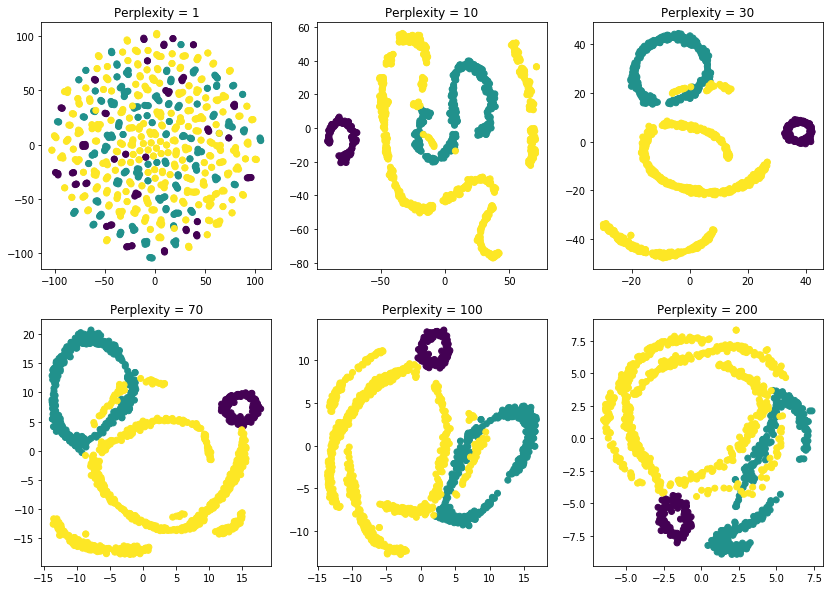

In [34]:
#with random initialization but using data_2 (with noise)
perplexities = [1, 10, 30, 70, 100, 200]
fig, axs = plt.subplots(2,3, figsize=(14,10))
for i in range(len(perplexities)):
    ax = axs[int(np.floor(i/3)),i%3]
    tsne_1 = TSNE(perplexity = perplexities[i],init='random',
                         random_state=0)
    data_2_embedded = tsne_1.fit_transform(data_2)
    ax.scatter(data_2_embedded[:,0], data_2_embedded[:,1], c=y_data_2)
    ax.set_title('Perplexity = %i' %(perplexities[i]))
plt.show()

#Adding noise makes everything different for sure...

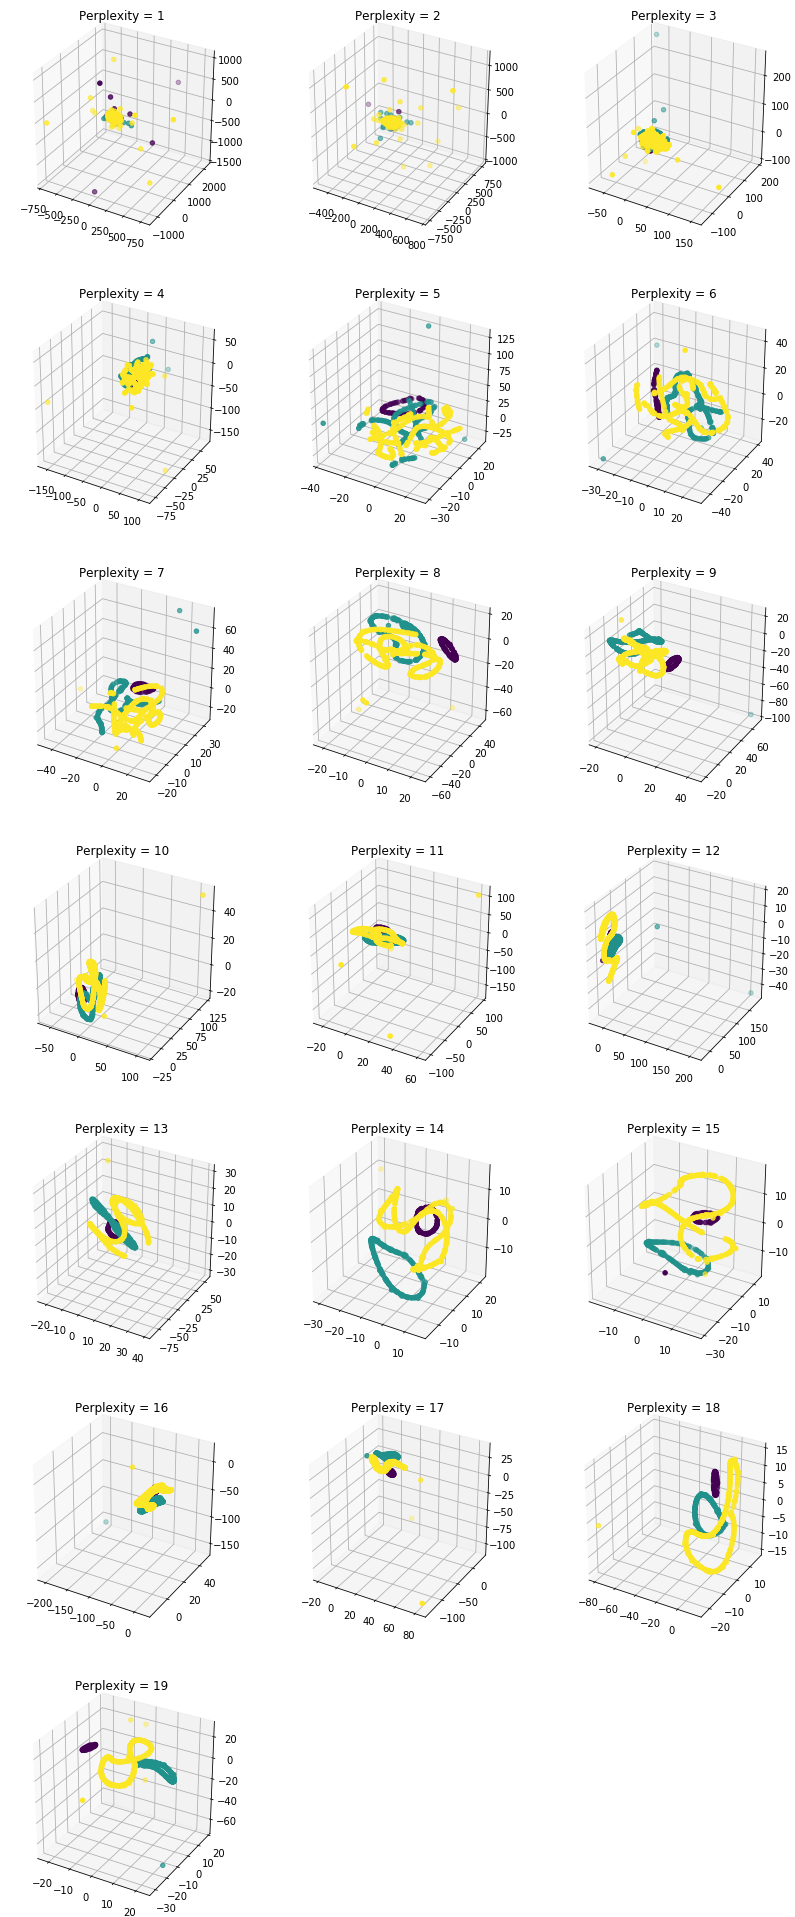

In [6]:
# with 3d projection
perplexities = np.arange(1,20,1)
fig = plt.figure(figsize=(14,5*np.ceil(len(perplexities)/3)))
for i in range(len(perplexities)):
    ax = fig.add_subplot(int(np.ceil(len(perplexities)/3)), 3, int(np.floor(i/3))*3+i%3+1,
                         projection='3d')
    tsne_1 = TSNE(n_components = 3,
                  perplexity = perplexities[i])
    data_1_embedded = tsne_1.fit_transform(data_1)
    ax.scatter(data_1_embedded[:,0], data_1_embedded[:,1], data_1_embedded[:,2], c=y_data_1)
    ax.set_title('Perplexity = %i' %(perplexities[i]))
plt.show()

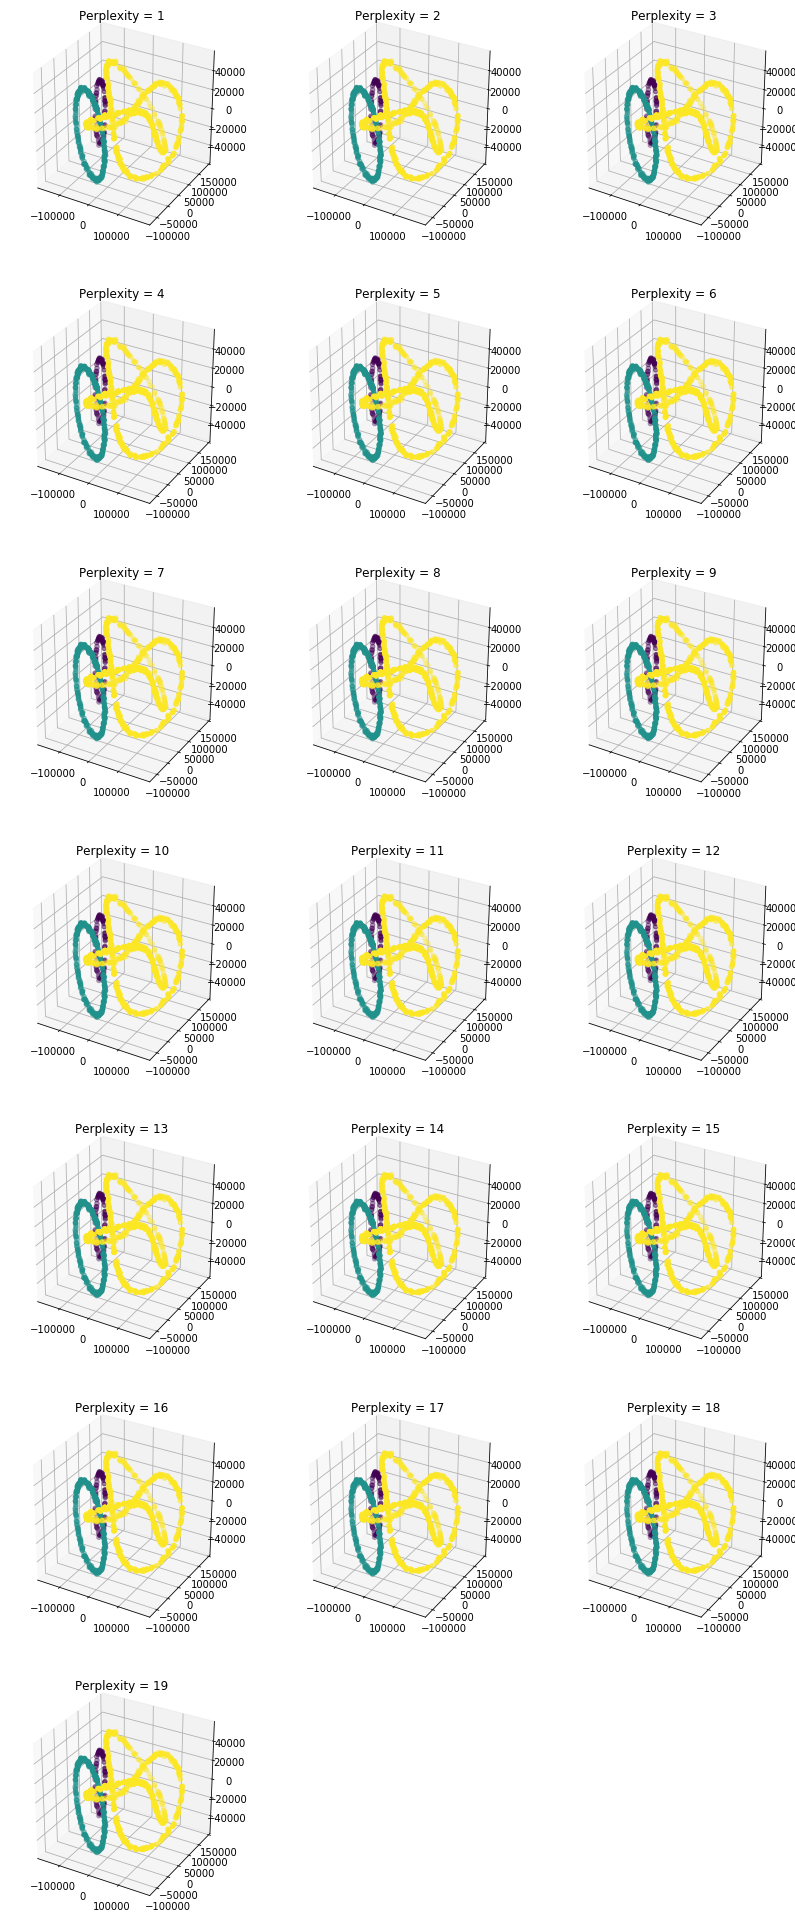

In [8]:
# with 3d projection and pca
perplexities = np.arange(1,20,1)
fig = plt.figure(figsize=(14,5*np.ceil(len(perplexities)/3)))
for i in range(len(perplexities)):
    ax = fig.add_subplot(int(np.ceil(len(perplexities)/3)), 3, int(np.floor(i/3))*3+i%3+1,
                         projection='3d')
    tsne_1 = TSNE(n_components = 3,
                  perplexity = perplexities[i], init = "pca")
    data_1_embedded = tsne_1.fit_transform(data_1)
    ax.scatter(data_1_embedded[:,0], data_1_embedded[:,1], data_1_embedded[:,2], c=y_data_1)
    ax.set_title('Perplexity = %i' %(perplexities[i]))
plt.show()

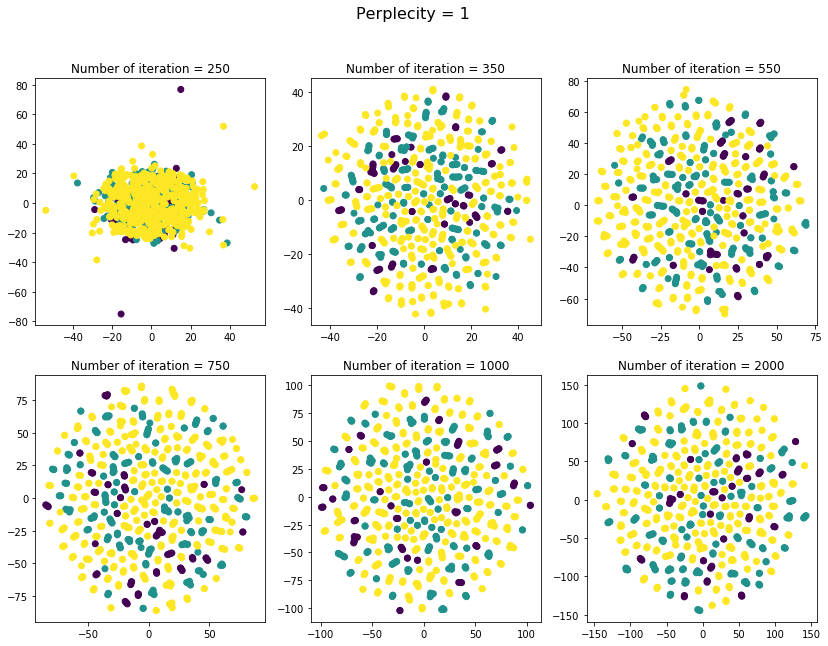

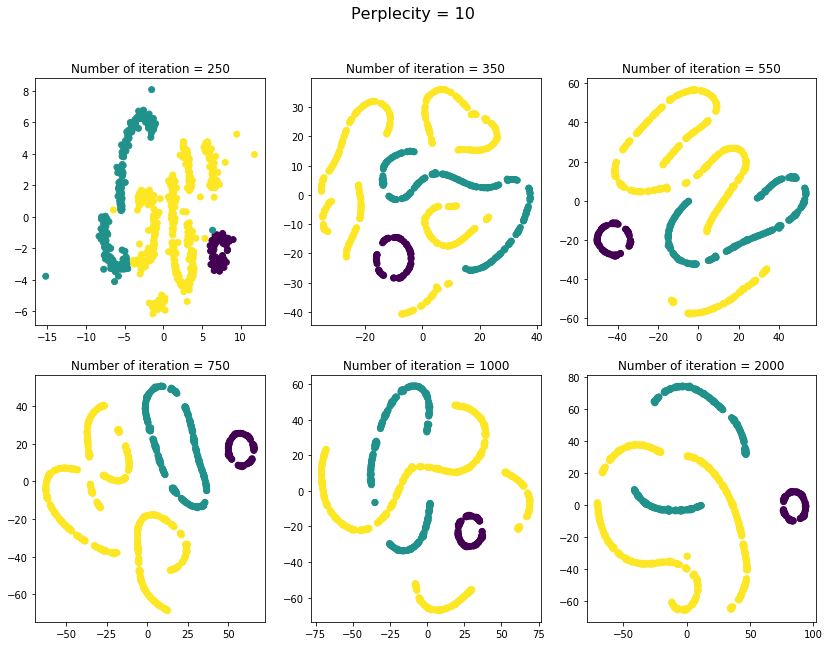

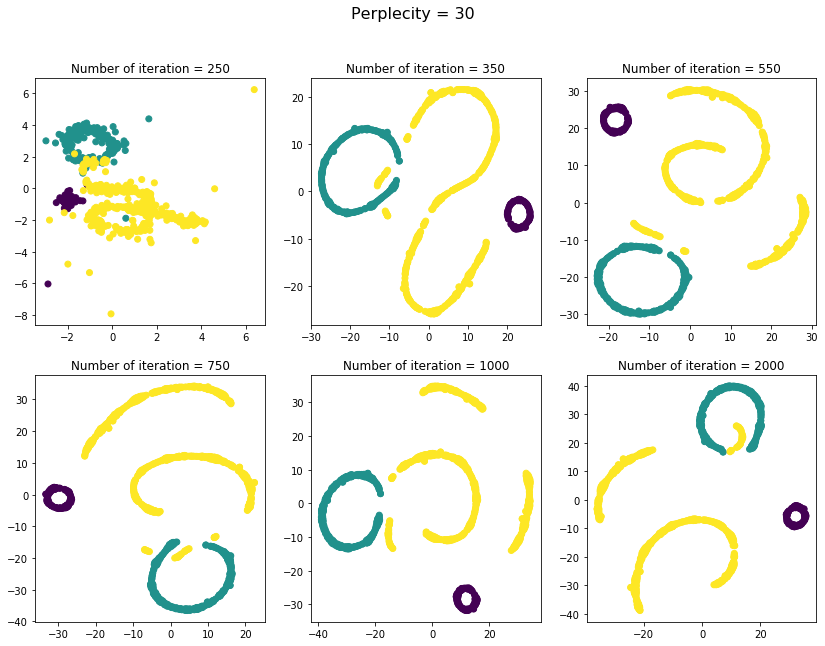

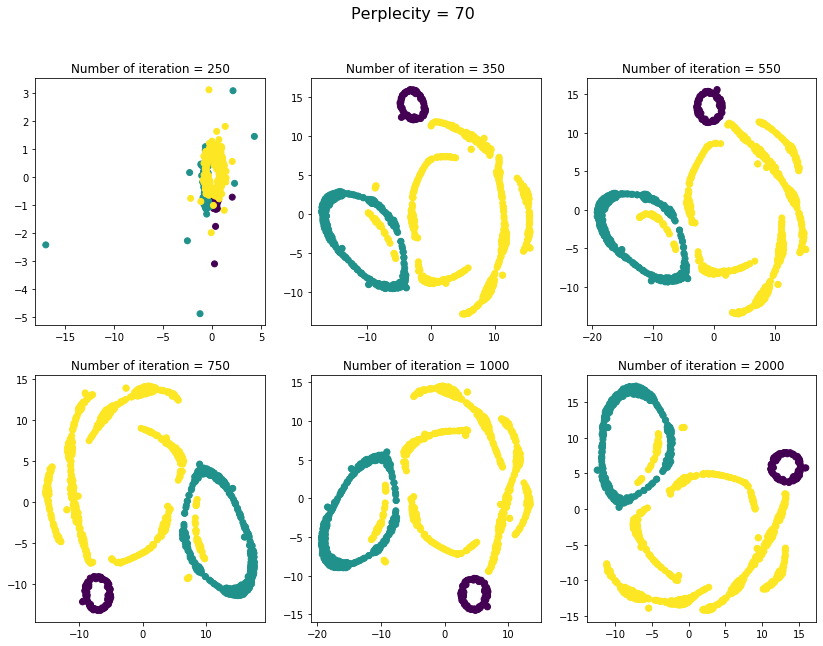

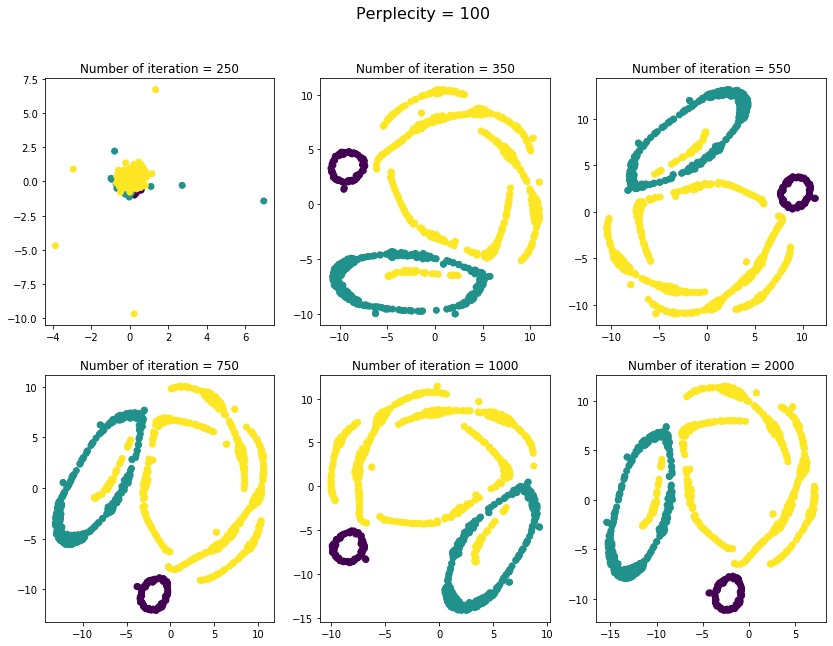

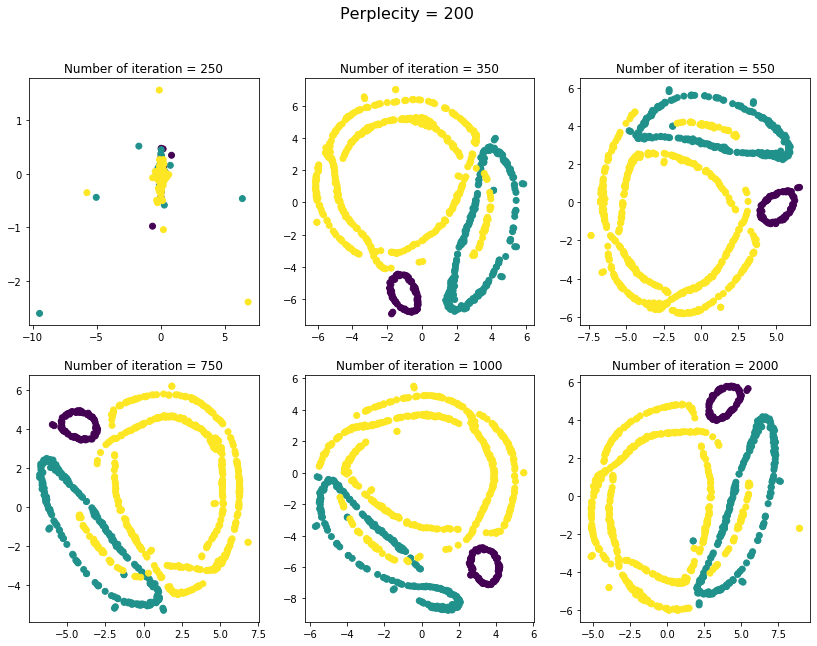

In [29]:
perplexities = [1, 10, 30, 70, 100, 200]
niters = [250, 350, 550, 750, 1000, 2000]

for j in range(len(perplexities)):    

    fig, axs = plt.subplots(2,3, figsize=(14,10))
    fig.suptitle('Perplecity = %i' %(perplexities[j]), fontsize=16)
    for i in range(len(niters)):
        ax = axs[int(np.floor(i/3)),i%3]
        tsne_1 = TSNE(n_components = 2,
                      n_iter = niters[i], perplexity = perplexities[j])
        data_1_embedded = tsne_1.fit_transform(data_1)
        ax.scatter(data_1_embedded[:,0], data_1_embedded[:,1], c=y_data_1)
        ax.set_title('Number of iteration = %i' %(niters[i]))
    plt.show()